In [161]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import birch

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as sm


% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [162]:
count_pca_kmeans_outfname = './Data/Analysis/count_pca_kmeans.csv'
dens_pca_kmeans_outfname = './Data/Analysis/dens_pca_kmeans.csv'

count_pca_brch_outfname = './Data/Analysis/count_pca_brch.csv'
dens_pca_brch_outfname = './Data/Analysis/dens_pca_brch.csv'

count_pca_hier_outfname = './Data/Analysis/count_pca_hier.csv'
dens_pca_hier_outfname = './Data/Analysis/dens_pca_hier.csv'

In [163]:
lhr_fname = './Data/Analysis/London_Road_Accident_Features.csv'

lhr_df = pd.read_csv(lhr_fname)
lhr_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,road_lengt,road_count,len_dens,...,sumjunc_co,buff_dens,transit_am,trans_dens,tree_cnt,tree_dens,bkjnc_amt,bkjnc_dens,acc_amt,acc_dens
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,38484.490745,463.0,50.9612,...,674.0,0.8925,47,0.0622,91,0.1205,18,0.0238,23,0.0305
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,31196.917857,331.0,120.2360,...,597.0,2.3009,21,0.0809,53,0.2043,20,0.0771,21,0.0809
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,19631.396026,208.0,135.0258,...,262.0,1.8020,24,0.1651,0,0.0000,5,0.0344,9,0.0619
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,29485.084687,300.0,109.8116,...,462.0,1.7206,38,0.1415,74,0.2756,18,0.0670,9,0.0335
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,20609.220105,226.0,109.7280,...,293.0,1.5600,28,0.1491,0,0.0000,12,0.0639,14,0.0745


In [164]:
lhr_df.columns

Index([u'NAME', u'GSS_CODE', u'HECTARES', u'NONLD_AREA', u'LB_GSS_CD',
       u'BOROUGH', u'POLY_ID', u'road_lengt', u'road_count', u'len_dens',
       u'road_dens', u'traffic_am', u'traf_dens', u'junc_amt', u'junc_dens',
       u'sumjunc_co', u'buff_dens', u'transit_am', u'trans_dens', u'tree_cnt',
       u'tree_dens', u'bkjnc_amt', u'bkjnc_dens', u'acc_amt', u'acc_dens'],
      dtype='object')

In [165]:
# setting the Wards and GSS Codes aside for later incorporation in to the 
Ward = lhr_df.iloc[:,0].as_matrix()
GSS = lhr_df.iloc[:,1].as_matrix()

## Clustering analysis for the counts

In [166]:
lhr_count_df = lhr_df[['NAME', 'GSS_CODE', 'HECTARES', 'BOROUGH', 'road_lengt', 'road_count','traffic_am', 
                       'junc_amt', 'sumjunc_co', 'transit_am', 'tree_cnt', 'bkjnc_amt', 'acc_amt']]
lhr_count_df.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,road_lengt,road_count,traffic_am,junc_amt,sumjunc_co,transit_am,tree_cnt,bkjnc_amt,acc_amt
0,Chessington South,E05000405,755.173,Kingston upon Thames,38484.490745,463.0,43068,245,674.0,47,91,18,23
1,Tolworth and Hook Rise,E05000414,259.464,Kingston upon Thames,31196.917857,331.0,225717,170,597.0,21,53,20,21
2,Berrylands,E05000401,145.390,Kingston upon Thames,19631.396026,208.0,1618,106,262.0,24,0,5,9
3,Alexandra,E05000400,268.506,Kingston upon Thames,29485.084687,300.0,177625,165,462.0,38,74,18,9
4,Beverley,E05000402,187.821,Kingston upon Thames,20609.220105,226.0,0,108,293.0,28,0,12,14


In [167]:
lhr_count_df.columns

Index([u'NAME', u'GSS_CODE', u'HECTARES', u'BOROUGH', u'road_lengt',
       u'road_count', u'traffic_am', u'junc_amt', u'sumjunc_co', u'transit_am',
       u'tree_cnt', u'bkjnc_amt', u'acc_amt'],
      dtype='object')

In [168]:
lhr_count_df.dtypes

NAME           object
GSS_CODE       object
HECTARES      float64
BOROUGH        object
road_lengt    float64
road_count    float64
traffic_am      int64
junc_amt        int64
sumjunc_co    float64
transit_am      int64
tree_cnt        int64
bkjnc_amt       int64
acc_amt         int64
dtype: object

In [169]:
# converts string values to index values for use in the anlaysis
label_encoder = preprocessing.LabelEncoder()
lhr_count_df['NAME'] = label_encoder.fit_transform(lhr_count_df['NAME'])
lhr_count_df['GSS_CODE'] = label_encoder.fit_transform(lhr_count_df['GSS_CODE'])
lhr_count_df['BOROUGH'] = label_encoder.fit_transform(lhr_count_df['BOROUGH'])

/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [170]:
lhr_count_df.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,road_lengt,road_count,traffic_am,junc_amt,sumjunc_co,transit_am,tree_cnt,bkjnc_amt,acc_amt
0,111,404,755.173,20,38484.490745,463.0,43068,245,674.0,47,91,18,23
1,550,413,259.464,20,31196.917857,331.0,225717,170,597.0,21,53,20,21
2,35,400,145.390,20,19631.396026,208.0,1618,106,262.0,24,0,5,9
3,10,399,268.506,20,29485.084687,300.0,177625,165,462.0,38,74,18,9
4,38,401,187.821,20,20609.220105,226.0,0,108,293.0,28,0,12,14


In [171]:
count_df_x = lhr_count_df.iloc[:,:-1]
count_df_y = lhr_count_df.iloc[:,-1]

In [172]:
count_df_x.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,road_lengt,road_count,traffic_am,junc_amt,sumjunc_co,transit_am,tree_cnt,bkjnc_amt
0,111,404,755.173,20,38484.490745,463.0,43068,245,674.0,47,91,18
1,550,413,259.464,20,31196.917857,331.0,225717,170,597.0,21,53,20
2,35,400,145.390,20,19631.396026,208.0,1618,106,262.0,24,0,5
3,10,399,268.506,20,29485.084687,300.0,177625,165,462.0,38,74,18
4,38,401,187.821,20,20609.220105,226.0,0,108,293.0,28,0,12


In [173]:
count_X = count_df_x.as_matrix()
count_Y = count_df_y.as_matrix()

In [174]:
# --------------------
# Normalizing data
# --------------------
count_Xtmax = np.amax(count_X,axis=0)
count_X = np.divide(count_X,count_Xtmax)

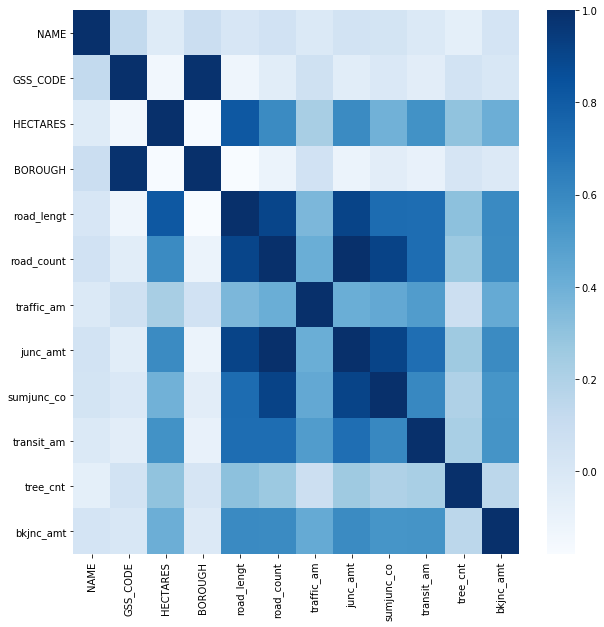

In [175]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))

sns.heatmap(lhr_count_df.iloc[:,:-1].corr(), vmax=1., square=False, cmap='Blues', ax=ax)

In [176]:
count_X = scale(count_X)
count_pca = PCA(n_components=12, svd_solver='full')
count_pca.fit(count_X)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [177]:
#The amount of variance that each PC explains
var= count_pca.explained_variance_ratio_

In [178]:
#Cumulative Variance explains
print("Explained Variance Ratios")
count_var1=np.cumsum(np.round(count_pca.explained_variance_ratio_, decimals=4)*100)
print(count_var1)

Explained Variance Ratios
[  46.13   63.16   72.14   80.24   86.36   91.83   96.1    98.93   99.77
   99.92   99.98  100.01]


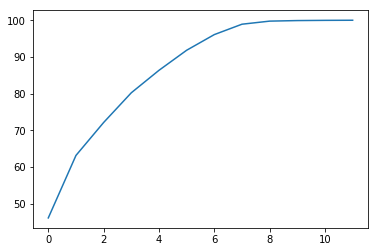

In [179]:
plt.plot(count_var1)

In [180]:
#Looking at above plot I'm taking 7 variables
count_pca = PCA(n_components=7)
count_pca.fit(count_X)
count_Xpca = count_pca.fit_transform(count_X)
# creating a second for the Birch clustering
count_Xk = count_Xpca
count_Xb = count_Xpca
count_Xh = count_Xpca

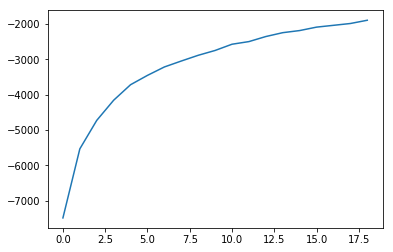

In [181]:
count_Ks = range(1, 20)
count_km = [cluster.KMeans(n_clusters=i) for i in count_Ks]
count_score = [count_km[i].fit(count_Xk).score(count_Xk) for i in range(len(count_km))]
plot(count_score)

### Clustering

In [182]:
# --------------------
# Clustering - Kmeans
# --------------------

count_km = cluster.KMeans(n_clusters=5, random_state=0)
count_km.fit(count_Xk)
count_cl = count_km.labels_
count_centroids = count_km.cluster_centers_

count_results = pd.DataFrame(data=count_cl, columns=['count_pca_kmeans_cluster'])
count_results['Ward'] = Ward
count_results['GSS'] = GSS

print(len(count_results))
print(count_results.head())

count_results.to_csv(count_pca_kmeans_outfname, index=False)

print(count_results.pivot_table(index=['count_pca_kmeans_cluster'], aggfunc=np.count_nonzero))

649
   count_pca_kmeans_cluster                    Ward        GSS
0                         3       Chessington South  E05000405
1                         1  Tolworth and Hook Rise  E05000414
2                         2              Berrylands  E05000401
3                         1               Alexandra  E05000400
4                         2                Beverley  E05000402
                          GSS  Ward
count_pca_kmeans_cluster           
0                          69    69
1                         251   251
2                         146   146
3                         182   182
4                           1     1


In [183]:
# --------------------
# Clustering - Birch
# --------------------

count_brch = cluster.Birch(branching_factor=5, n_clusters=5, threshold=0.5, compute_labels=True)
count_brch.fit(count_Xb)
count_cl_brch = count_brch.labels_

count_brch_results = pd.DataFrame(data=count_cl_brch, columns=['count_pca_brch_cluster'])
count_brch_results['Ward'] = Ward
count_brch_results['GSS'] = GSS

print(len(count_brch_results))
print(count_brch_results.head())
print(count_brch_results.pivot_table(index=['count_pca_brch_cluster'], aggfunc=np.count_nonzero))

count_brch_results.to_csv(count_pca_brch_outfname, index=False)

649
   count_pca_brch_cluster                    Ward        GSS
0                       0       Chessington South  E05000405
1                       2  Tolworth and Hook Rise  E05000414
2                       2              Berrylands  E05000401
3                       2               Alexandra  E05000400
4                       2                Beverley  E05000402
                        GSS  Ward
count_pca_brch_cluster           
0                       219   219
1                        46    46
2                       228   228
3                         1     1
4                       155   155


In [184]:
# --------------------
# Clustering - Hierarchical
# --------------------

count_hc = cluster.AgglomerativeClustering(n_clusters=5, linkage='ward')
count_hc.fit(count_Xh)
count_hcl = count_hc.labels_

count_hcl_results = pd.DataFrame(data=count_hcl, columns=['count_pca_hcl_cluster'])
count_hcl_results['Ward'] = Ward
count_hcl_results['GSS'] = GSS

print(len(count_hcl_results))
print(count_hcl_results.head())
print(count_hcl_results.pivot_table(index=['count_pca_hcl_cluster'], aggfunc=np.count_nonzero))

count_hcl_results.to_csv(count_pca_hier_outfname, index=False)

649
   count_pca_hcl_cluster                    Ward        GSS
0                      1       Chessington South  E05000405
1                      3  Tolworth and Hook Rise  E05000414
2                      3              Berrylands  E05000401
3                      3               Alexandra  E05000400
4                      3                Beverley  E05000402
                       GSS  Ward
count_pca_hcl_cluster           
0                       46    46
1                      238   238
2                      135   135
3                      229   229
4                        1     1


### Classifiers

In [185]:
# --------------------
# K-fold CV
# --------------------
count_X_train, count_X_test, count_Y_train, count_Y_test = train_test_split(count_Xpca, count_Y, 
                                                                            train_size=0.7, random_state=3)
count_ts, = count_Y_test.shape

In [186]:
# --------------------
# Decision Tree Classifier
# --------------------
# Train
count_dtc = DecisionTreeClassifier()
count_dtc.fit(count_X_train, count_Y_train)

# Predicting
count_dtc_pred = count_dtc.predict(count_X_test)

# Finding mispredicted samples
count_dtc_verror = np.asarray([int(count_dtc_pred[i] != count_Y_test[i]) for i in range(0,count_ts)])
count_dtc_error = np.sum(count_dtc_verror)
count_dtc_ccidx = np.where(count_dtc_verror == 0)
count_dtc_mcidx = np.where(count_dtc_verror == 1)

print("----------Decision Tree Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (count_dtc_error, count_ts, count_dtc_error/count_ts, '%'))

# --------------------
# Bagging Classifier
# --------------------
count_bagb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=20)
#adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=20,learning_rate=1.5,algorithm="SAMME")
count_bagb.fit(count_X_train,count_Y_train)

# Predicting
count_bagb_pred = count_bagb.predict(count_X_test)

# Finding mispredicted samples
count_bagb_verror = np.asarray([int(count_bagb_pred[i] != count_Y_test[i]) for i in range(0,count_ts)])
count_bagb_error = np.sum(count_bagb_verror)
count_bagb_ccidx = np.where(count_bagb_verror == 0)
count_bagb_mcidx = np.where(count_bagb_verror == 1)

print("----------Bagging Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (count_bagb_error, count_ts, count_bagb_error/count_ts, '%'))

# --------------------
# AdaBoost Classifier
# --------------------
count_adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=20)
#adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=20,learning_rate=1.5,algorithm="SAMME")
count_adab.fit(count_X_train,count_Y_train)

# Predicting
count_adab_pred = count_adab.predict(count_X_test)

# Finding mispredicted samples
count_adab_verror = np.asarray([int(count_adab_pred[i] != count_Y_test[i]) for i in range(0,count_ts)])
count_adab_error = np.sum(count_adab_verror)
count_adab_ccidx = np.where(count_adab_verror == 0)
count_adab_mcidx = np.where(count_adab_verror == 1)

print("----------AdaBoosting Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (count_adab_error, count_ts, count_adab_error/count_ts, '%'))

# --------------------
# Gradient Boosting Classifier
# --------------------
count_gradb = GradientBoostingClassifier(max_depth=5, n_estimators=30)
count_gradb.fit(count_X_train,count_Y_train)

# Predicting
count_gradb_pred = count_gradb.predict(count_X_test)

# Finding mispredicted samples
count_gradb_verror = np.asarray([int(count_gradb_pred[i] != count_Y_test[i]) for i in range(0,count_ts)])
count_gradb_error = np.sum(count_gradb_verror)
count_gradb_ccidx = np.where(count_gradb_verror == 0)
count_gradb_mcidx = np.where(count_gradb_verror == 1)

print("----------Gradient Boosting Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (count_gradb_error, count_ts, count_gradb_error/count_ts, '%'))

# --------------------
# Random Forest Classifier
# --------------------
count_rdf = RandomForestClassifier(max_depth=5, n_estimators=30)
count_rdf.fit(count_X_train,count_Y_train)

# Predicting
count_rdf_pred = count_rdf.predict(count_X_test)

# Finding mispredicted samples
count_rdf_verror = np.asarray([int(count_rdf_pred[i] != count_Y_test[i]) for i in range(0,count_ts)])
count_rdf_error = np.sum(count_rdf_verror)
count_rdf_ccidx = np.where(count_rdf_verror == 0)
count_rdf_mcidx = np.where(count_rdf_verror == 1)

print("----------Random Forest Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (count_rdf_error, count_ts, count_rdf_error/count_ts, '%'))


----------Decision Tree Classfication----------
192 misclassified data out of 195 (0 %)
----------Bagging Classfication----------
188 misclassified data out of 195 (0 %)
----------AdaBoosting Classfication----------
189 misclassified data out of 195 (0 %)
----------Gradient Boosting Classfication----------
190 misclassified data out of 195 (0 %)
----------Random Forest Classfication----------
190 misclassified data out of 195 (0 %)


## Clustering analysis for the counts

In [187]:
lhr_dens_df = lhr_df[['NAME', 'GSS_CODE', 'HECTARES', 'BOROUGH', 'len_dens', 'road_dens', 'traf_dens', 
                      'junc_dens', 'buff_dens', 'trans_dens', 'tree_dens', 'bkjnc_dens', 'acc_dens']]
lhr_dens_df.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens,acc_dens
0,Chessington South,E05000405,755.173,Kingston upon Thames,50.9612,0.6131,57.0306,0.3244,0.8925,0.0622,0.1205,0.0238,0.0305
1,Tolworth and Hook Rise,E05000414,259.464,Kingston upon Thames,120.2360,1.2757,869.9357,0.6552,2.3009,0.0809,0.2043,0.0771,0.0809
2,Berrylands,E05000401,145.390,Kingston upon Thames,135.0258,1.4306,11.1287,0.7291,1.8020,0.1651,0.0000,0.0344,0.0619
3,Alexandra,E05000400,268.506,Kingston upon Thames,109.8116,1.1173,661.5308,0.6145,1.7206,0.1415,0.2756,0.0670,0.0335
4,Beverley,E05000402,187.821,Kingston upon Thames,109.7280,1.2033,0.0000,0.5750,1.5600,0.1491,0.0000,0.0639,0.0745


In [188]:
# converts string values to index values for use in the anlaysis
label_encoder = preprocessing.LabelEncoder()
lhr_dens_df['NAME'] = label_encoder.fit_transform(lhr_dens_df['NAME'])
lhr_dens_df['GSS_CODE'] = label_encoder.fit_transform(lhr_dens_df['GSS_CODE'])
lhr_dens_df['BOROUGH'] = label_encoder.fit_transform(lhr_dens_df['BOROUGH'])

/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [189]:
lhr_dens_df.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens,acc_dens
0,111,404,755.173,20,50.9612,0.6131,57.0306,0.3244,0.8925,0.0622,0.1205,0.0238,0.0305
1,550,413,259.464,20,120.2360,1.2757,869.9357,0.6552,2.3009,0.0809,0.2043,0.0771,0.0809
2,35,400,145.390,20,135.0258,1.4306,11.1287,0.7291,1.8020,0.1651,0.0000,0.0344,0.0619
3,10,399,268.506,20,109.8116,1.1173,661.5308,0.6145,1.7206,0.1415,0.2756,0.0670,0.0335
4,38,401,187.821,20,109.7280,1.2033,0.0000,0.5750,1.5600,0.1491,0.0000,0.0639,0.0745


In [190]:
dens_df_x = lhr_dens_df.iloc[:,:-1]
dens_df_y = lhr_dens_df.iloc[:,-1]

In [191]:
dens_df_x.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens
0,111,404,755.173,20,50.9612,0.6131,57.0306,0.3244,0.8925,0.0622,0.1205,0.0238
1,550,413,259.464,20,120.2360,1.2757,869.9357,0.6552,2.3009,0.0809,0.2043,0.0771
2,35,400,145.390,20,135.0258,1.4306,11.1287,0.7291,1.8020,0.1651,0.0000,0.0344
3,10,399,268.506,20,109.8116,1.1173,661.5308,0.6145,1.7206,0.1415,0.2756,0.0670
4,38,401,187.821,20,109.7280,1.2033,0.0000,0.5750,1.5600,0.1491,0.0000,0.0639


In [192]:
dens_X = dens_df_x.as_matrix()
dens_Y = dens_df_y.as_matrix()

In [193]:
# --------------------
# Normalizing data
# --------------------
dens_Xtmax = np.amax(dens_X,axis=0)
dens_X = np.divide(dens_X,dens_Xtmax)

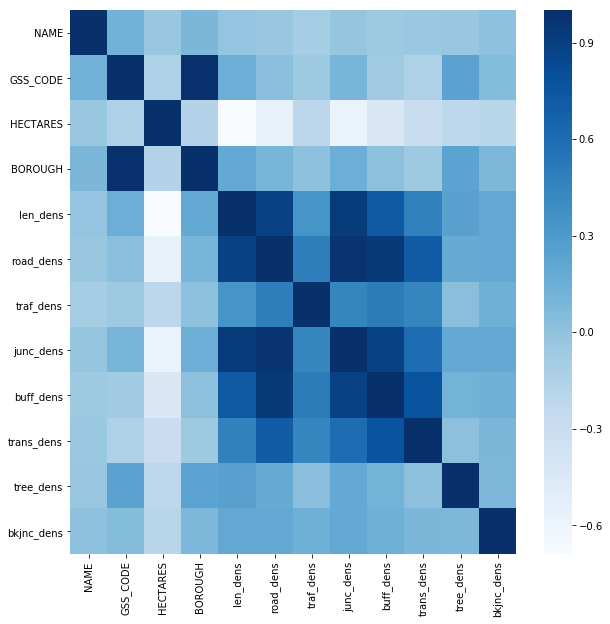

In [194]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))

sns.heatmap(lhr_dens_df.iloc[:,:-1].corr(), vmax=1., square=False, cmap='Blues', ax=ax)

In [195]:
dens_X = scale(dens_X)
dens_pca = PCA(n_components=12, svd_solver='full')
dens_pca.fit(dens_X)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [196]:
#Cumulative Variance explains
print("Explained Variance Ratios")
dens_var1=np.cumsum(np.round(dens_pca.explained_variance_ratio_, decimals=4)*100)
print(dens_var1)

Explained Variance Ratios
[ 41.26  59.61  68.09  76.37  84.11  90.35  95.2   98.58  99.59  99.84
  99.96  99.98]


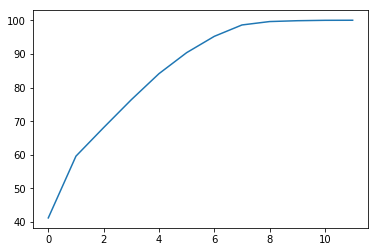

In [197]:
plt.plot(dens_var1)

In [198]:
#Looking at above plot I'm taking 7 variables
dens_pca = PCA(n_components=7)
dens_pca.fit(dens_X)
dens_Xpca = dens_pca.fit_transform(dens_X)
# creating a second for the Birch clustering
dens_Xk = dens_Xpca
dens_Xb = dens_Xpca
dens_Xh = dens_Xpca

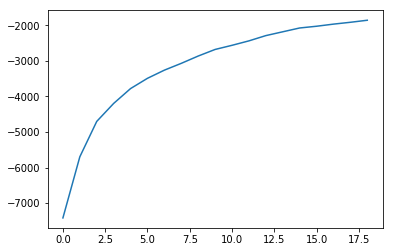

In [199]:
dens_Ks = range(1, 20)
dens_km = [cluster.KMeans(n_clusters=i) for i in dens_Ks]
dens_score = [dens_km[i].fit(dens_Xk).score(dens_Xk) for i in range(len(dens_km))]
plot(dens_score)

In [200]:
# --------------------
# Clustering - Kmeans
# --------------------

dens_km = cluster.KMeans(n_clusters=5, random_state=0)
dens_km.fit(dens_Xk)
dens_cl = dens_km.labels_
dens_centroids = dens_km.cluster_centers_

dens_results = pd.DataFrame(data=dens_cl, columns=['dens_pca_kmeans_cluster'])
dens_results['Ward'] = Ward
dens_results['GSS'] = GSS

print(len(dens_results))
print(dens_results.head())

dens_results.to_csv(dens_pca_kmeans_outfname, index=False)

print(dens_results.pivot_table(index=['dens_pca_kmeans_cluster'], aggfunc=np.count_nonzero))

649
   dens_pca_kmeans_cluster                    Ward        GSS
0                        4       Chessington South  E05000405
1                        1  Tolworth and Hook Rise  E05000414
2                        1              Berrylands  E05000401
3                        1               Alexandra  E05000400
4                        1                Beverley  E05000402
                         GSS  Ward
dens_pca_kmeans_cluster           
0                        243   243
1                        185   185
2                        135   135
3                         25    25
4                         61    61


In [201]:
# --------------------
# Clustering - Birch
# --------------------

dens_brch = cluster.Birch(branching_factor=5, n_clusters=5, threshold=0.5, compute_labels=True)
dens_brch.fit(dens_Xb)
dens_cl_brch = dens_brch.labels_

dens_brch_results = pd.DataFrame(data=dens_cl_brch, columns=['dens_pca_brch_cluster'])
dens_brch_results['Ward'] = Ward
dens_brch_results['GSS'] = GSS

print(len(dens_brch_results))
print(dens_brch_results.head())
print(dens_brch_results.pivot_table(index=['dens_pca_brch_cluster'], aggfunc=np.count_nonzero))

dens_brch_results.to_csv(dens_pca_brch_outfname, index=False)

649
   dens_pca_brch_cluster                    Ward        GSS
0                      2       Chessington South  E05000405
1                      4  Tolworth and Hook Rise  E05000414
2                      1              Berrylands  E05000401
3                      2               Alexandra  E05000400
4                      2                Beverley  E05000402
                       GSS  Ward
dens_pca_brch_cluster           
0                       19    19
1                      217   217
2                       69    69
3                      112   112
4                      232   232


In [202]:
# --------------------
# Clustering - Hierarchical
# --------------------

dens_hc = cluster.AgglomerativeClustering(n_clusters=5, linkage='ward')
dens_hc.fit(dens_Xh)
dens_hcl = dens_hc.labels_

dens_hcl_results = pd.DataFrame(data=dens_hcl, columns=['dens_pca_hcl_cluster'])
dens_hcl_results['Ward'] = Ward
dens_hcl_results['GSS'] = GSS

print(len(dens_hcl_results))
print(dens_hcl_results.head())
print(dens_hcl_results.pivot_table(index=['dens_pca_hcl_cluster'], aggfunc=np.count_nonzero))

dens_hcl_results.to_csv(dens_pca_hier_outfname, index=False)

649
   dens_pca_hcl_cluster                    Ward        GSS
0                     4       Chessington South  E05000405
1                     2  Tolworth and Hook Rise  E05000414
2                     1              Berrylands  E05000401
3                     4               Alexandra  E05000400
4                     4                Beverley  E05000402
                      GSS  Ward
dens_pca_hcl_cluster           
0                      20    20
1                     228   228
2                     191   191
3                     109   109
4                     101   101


### Classifiers

In [203]:
# --------------------
# K-fold CV
# --------------------
dens_X_train, dens_X_test, dens_Y_train, dens_Y_test = train_test_split(dens_Xpca, dens_Y, 
                                                                            train_size=0.7, random_state=3)
dens_ts, = dens_Y_test.shape

In [204]:
# --------------------
# Decision Tree Regressor
# --------------------
# Train
dens_dtc = DecisionTreeRegressor()
dens_dtc.fit(dens_X_train, dens_Y_train)

# Predicting
dens_dtc_pred = dens_dtc.predict(dens_X_test)

# Finding mispredicted samples
dens_dtc_verror = np.asarray([int(dens_dtc_pred[i] != dens_Y_test[i]) for i in range(0,dens_ts)])
dens_dtc_error = np.sum(dens_dtc_verror)
dens_dtc_ccidx = np.where(dens_dtc_verror == 0)
dens_dtc_mcidx = np.where(dens_dtc_verror == 1)

print("----------Decision Tree Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (dens_dtc_error, dens_ts, dens_dtc_error/dens_ts, '%'))

# --------------------
# Bagging Regressor
# --------------------
dens_bagb = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=20)
#adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=20,learning_rate=1.5,algorithm="SAMME")
dens_bagb.fit(dens_X_train,dens_Y_train)

# Predicting
dens_bagb_pred = dens_bagb.predict(dens_X_test)

# Finding mispredicted samples
dens_bagb_verror = np.asarray([int(dens_bagb_pred[i] != dens_Y_test[i]) for i in range(0,dens_ts)])
dens_bagb_error = np.sum(dens_bagb_verror)
dens_bagb_ccidx = np.where(dens_bagb_verror == 0)
dens_bagb_mcidx = np.where(dens_bagb_verror == 1)

print("----------Bagging Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (dens_bagb_error, dens_ts, dens_bagb_error/dens_ts, '%'))

# --------------------
# AdaBoost Classifier
# --------------------
dens_adab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=20)
#adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=20,learning_rate=1.5,algorithm="SAMME")
dens_adab.fit(dens_X_train,dens_Y_train)

# Predicting
dens_adab_pred = dens_adab.predict(dens_X_test)

# Finding mispredicted samples
dens_adab_verror = np.asarray([int(dens_adab_pred[i] != dens_Y_test[i]) for i in range(0,dens_ts)])
dens_adab_error = np.sum(dens_adab_verror)
dens_adab_ccidx = np.where(dens_adab_verror == 0)
dens_adab_mcidx = np.where(dens_adab_verror == 1)

print("----------AdaBoosting Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (dens_adab_error, dens_ts, dens_adab_error/dens_ts, '%'))

# --------------------
# Gradient Boosting Classifier
# --------------------
dens_gradb = GradientBoostingRegressor(max_depth=5, n_estimators=30)
dens_gradb.fit(dens_X_train,dens_Y_train)

# Predicting
dens_gradb_pred = dens_gradb.predict(dens_X_test)

# Finding mispredicted samples
dens_gradb_verror = np.asarray([int(dens_gradb_pred[i] != dens_Y_test[i]) for i in range(0,dens_ts)])
dens_gradb_error = np.sum(dens_gradb_verror)
dens_gradb_ccidx = np.where(dens_gradb_verror == 0)
dens_gradb_mcidx = np.where(dens_gradb_verror == 1)

print("----------Gradient Boosting Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (dens_gradb_error, dens_ts, dens_gradb_error/dens_ts, '%'))

# --------------------
# Random Forest Classifier
# --------------------
dens_rdf = RandomForestRegressor(max_depth=5, n_estimators=30)
dens_rdf.fit(dens_X_train,dens_Y_train)

# Predicting
dens_rdf_pred = dens_rdf.predict(dens_X_test)

# Finding mispredicted samples
dens_rdf_verror = np.asarray([int(dens_rdf_pred[i] != dens_Y_test[i]) for i in range(0,dens_ts)])
dens_rdf_error = np.sum(dens_rdf_verror)
dens_rdf_ccidx = np.where(dens_rdf_verror == 0)
dens_rdf_mcidx = np.where(dens_rdf_verror == 1)

print("----------Random Forest Classfication----------")
print("%s misclassified data out of %s (%s %s)" % (dens_rdf_error, dens_ts, dens_rdf_error/dens_ts, '%'))


----------Decision Tree Classfication----------
195 misclassified data out of 195 (1 %)
----------Bagging Classfication----------
195 misclassified data out of 195 (1 %)
----------AdaBoosting Classfication----------
195 misclassified data out of 195 (1 %)
----------Gradient Boosting Classfication----------
195 misclassified data out of 195 (1 %)
----------Random Forest Classfication----------
195 misclassified data out of 195 (1 %)
